In [3]:
import pandas as pd
import numpy as np

train = pd.read_csv('./data/train_ndf.csv')
train.drop(['Unnamed: 0'], axis=1, inplace=True)

pd.set_option('display.max_columns', None)

train.drop(['가구원수', '결혼여부', '1년간 체중 변화 여부', '1년간 체중 감소량', '1년간 체중 증가량', '평소 하루 앉아서 보내는 시간(시간)', '평소 하루 앉아서 보내는 시간(분)', 
    '걷기 지속 시간(시간)', '걷기 지속 시간(분)', '유산소 신체활동 실천율', '(만12세이상) 주중 잠자리에 든 시각_시', '(만12세이상) 주중 일어난 시각_시', '(만12세이상) 주말 잠자리에 든 시각_시',
    '(만12세이상) 주말 일어난 시각_시', '최근 1년 동안 평균 과일류 섭취 빈도', '[탄산음료]의 최근 1년간 평균섭취빈도', '[스포츠음료]의 최근 1년간 평균섭취빈도', '[에너지음료]의최근 1년간 평균섭취빈도',
    '[당이 첨가된 과일주스, 채소주스]의 최근 1년간 평균섭취빈도', '[당이 첨가된 커피, 커피음료]의  최근 1년간 평균섭취빈도', '직업재분류 및 실업/비경제활동', '결혼상태',
    '고강도 신체활동 여부: 일', '중강도 신체활동 여부: 일', '1주일간 걷기 일수', '1주일간 근력운동 일수', '최근 1년 동안 1주 동안 아침식사 빈도', '최근 1년 동안 1주 동안 점심식사 빈도', 
    '최근 1년동안 1주 동안 저녁식사 빈도', '최근 1년 동안 아침식사 시 가족 및 가족 외 사람과의 동반 여부', '최근 1년 동안 점심식사 시 가족 및 가족 외 사람과의 동반 여부',
    '최근 1년 동안 저녁식사 시 가족 및 가족 외 사람과의 동반 여부', '1주일간 걷는 총 시간', '주관적 체형인식'
], axis=1, inplace=True)

train

,성별,나이,월평균 가구총소득,주관적 건강인지,활동제한 여부,주당 평균 근로시간,평소 스트레스 인지 정도,우울증 분류,현재 우울증 여부(PHQ),1년간 체중 변화량,하루에 앉아서 보내는 시간,1인가구
0,여성,30,355.833333,3.0,2.0,54.0,3.0,정상,0.0,-1.0,10.000000,False
1,여성,56,355.833333,4.0,1.0,0.0,2.0,가벼운 우울증,1.0,-1.0,5.000000,False
2,남성,29,355.833333,3.0,2.0,50.0,4.0,정상,0.0,-1.0,8.000000,False
3,남성,65,78.000000,3.0,2.0,39.0,3.0,정상,0.0,-3.0,2.166667,False
4,여성,57,130.000000,4.0,2.0,0.0,4.0,정상,0.0,0.0,8.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
28722,여성,26,208.333333,2.0,NaN,45.0,3.0,정상,0.0,0.0,8.000000,False
28723,남성,31,375.000000,4.0,NaN,40.0,2.0,중간정도 우울증,1.0,0.0,13.000000,True
28724,여성,58,704.166667,3.0,NaN,60.0,3.0,정상,0.0,0.0,5.000000,False
28725,남성,62,704.166667,2.0,NaN,48.0,3.0,정상,0.0,0.0,6.500000,False


In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'

# 음수 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [4]:
train['평소 스트레스 인지 정도'].value_counts()

평소 스트레스 인지 정도
3.0    16323
2.0     6093
4.0     5012
1.0     1299
Name: count, dtype: int64

In [121]:
train.isnull().sum().sum()

9934

In [122]:
train.dropna(inplace=True)

In [123]:
train['활동제한 여부'] = train['활동제한 여부'].apply(lambda x : True if x == 1 else False )

In [124]:
train

,성별,나이,월평균 가구총소득,주관적 건강인지,활동제한 여부,주당 평균 근로시간,평소 스트레스 인지 정도,우울증 분류,현재 우울증 여부(PHQ),1년간 체중 변화량,하루에 앉아서 보내는 시간,1인가구
0,여성,30,355.833333,3.0,False,54.0,3.0,정상,0.0,-1.0,10.000000,False
1,여성,56,355.833333,4.0,True,0.0,2.0,가벼운 우울증,1.0,-1.0,5.000000,False
2,남성,29,355.833333,3.0,False,50.0,4.0,정상,0.0,-1.0,8.000000,False
3,남성,65,78.000000,3.0,False,39.0,3.0,정상,0.0,-3.0,2.166667,False
4,여성,57,130.000000,4.0,False,0.0,4.0,정상,0.0,0.0,8.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...
23621,여성,61,308.333333,3.0,False,25.0,3.0,정상,0.0,0.0,4.000000,False
23622,여성,51,500.000000,3.0,False,45.0,3.0,정상,0.0,0.0,6.000000,False
23623,여성,24,500.000000,3.0,False,40.0,3.0,정상,0.0,1.0,5.000000,False
23624,남성,65,196.666667,2.0,False,0.0,3.0,정상,0.0,0.0,4.000000,False


In [125]:
# One-Hot Encoding 적용
train = pd.get_dummies(train, columns=['성별'])

train

,나이,월평균 가구총소득,주관적 건강인지,활동제한 여부,주당 평균 근로시간,평소 스트레스 인지 정도,우울증 분류,현재 우울증 여부(PHQ),1년간 체중 변화량,하루에 앉아서 보내는 시간,1인가구,성별_남성,성별_여성
0,30,355.833333,3.0,False,54.0,3.0,정상,0.0,-1.0,10.000000,False,False,True
1,56,355.833333,4.0,True,0.0,2.0,가벼운 우울증,1.0,-1.0,5.000000,False,False,True
2,29,355.833333,3.0,False,50.0,4.0,정상,0.0,-1.0,8.000000,False,True,False
3,65,78.000000,3.0,False,39.0,3.0,정상,0.0,-3.0,2.166667,False,True,False
4,57,130.000000,4.0,False,0.0,4.0,정상,0.0,0.0,8.000000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23621,61,308.333333,3.0,False,25.0,3.0,정상,0.0,0.0,4.000000,False,False,True
23622,51,500.000000,3.0,False,45.0,3.0,정상,0.0,0.0,6.000000,False,False,True
23623,24,500.000000,3.0,False,40.0,3.0,정상,0.0,1.0,5.000000,False,False,True
23624,65,196.666667,2.0,False,0.0,3.0,정상,0.0,0.0,4.000000,False,True,False


In [126]:
train['1년간 체중 변화량'] = train['1년간 체중 변화량'].astype('category')

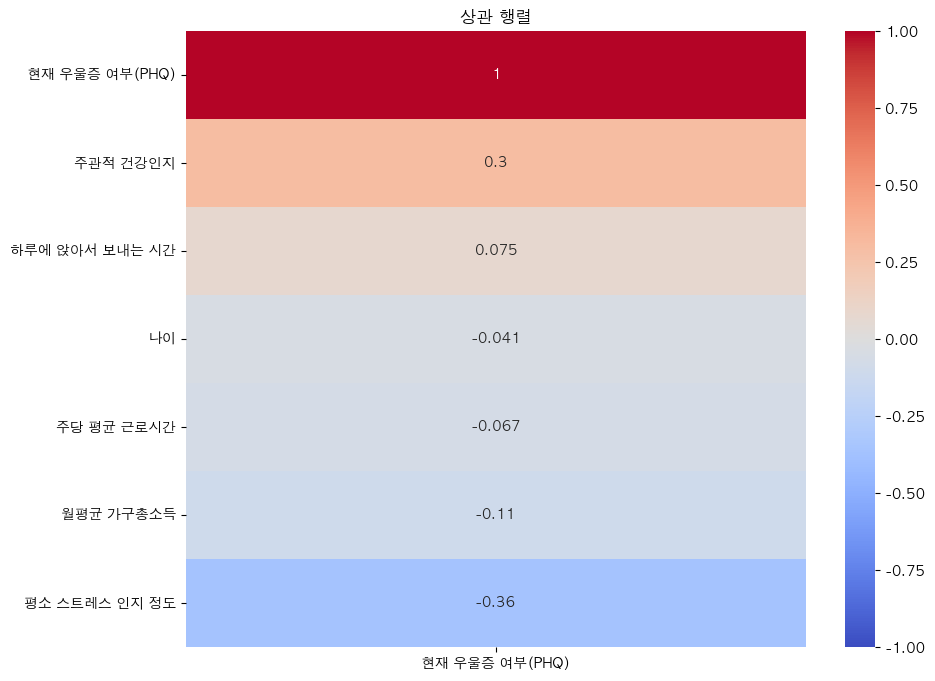

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 숫자형 데이터만 선택 (문자열 또는 범주형 데이터 제외)
numeric_train_lr = train.select_dtypes(include=[np.number])

# 상관 행렬 계산
correlation_matrix = numeric_train_lr.corr()

# '우울증 의사 진단 여부'와의 상관 관계 추출
depression_corr = correlation_matrix[['현재 우울증 여부(PHQ)']].sort_values(by='현재 우울증 여부(PHQ)', ascending=False)

# 상관 계수 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(depression_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('상관 행렬')
plt.show()

In [130]:
train

,나이,월평균 가구총소득,주관적 건강인지,활동제한 여부,주당 평균 근로시간,평소 스트레스 인지 정도,우울증 분류,현재 우울증 여부(PHQ),1년간 체중 변화량,하루에 앉아서 보내는 시간,1인가구,성별_남성,성별_여성
0,30,355.833333,3.0,False,54.0,3.0,정상,0.0,-1.0,10.000000,False,False,True
1,56,355.833333,4.0,True,0.0,2.0,가벼운 우울증,1.0,-1.0,5.000000,False,False,True
2,29,355.833333,3.0,False,50.0,4.0,정상,0.0,-1.0,8.000000,False,True,False
3,65,78.000000,3.0,False,39.0,3.0,정상,0.0,-3.0,2.166667,False,True,False
4,57,130.000000,4.0,False,0.0,4.0,정상,0.0,0.0,8.000000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23621,61,308.333333,3.0,False,25.0,3.0,정상,0.0,0.0,4.000000,False,False,True
23622,51,500.000000,3.0,False,45.0,3.0,정상,0.0,0.0,6.000000,False,False,True
23623,24,500.000000,3.0,False,40.0,3.0,정상,0.0,1.0,5.000000,False,False,True
23624,65,196.666667,2.0,False,0.0,3.0,정상,0.0,0.0,4.000000,False,True,False


# 로지스틱 회귀

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      6438
           1       0.41      0.73      0.53      1449

    accuracy                           0.76      7887
   macro avg       0.67      0.75      0.68      7887
weighted avg       0.83      0.76      0.78      7887



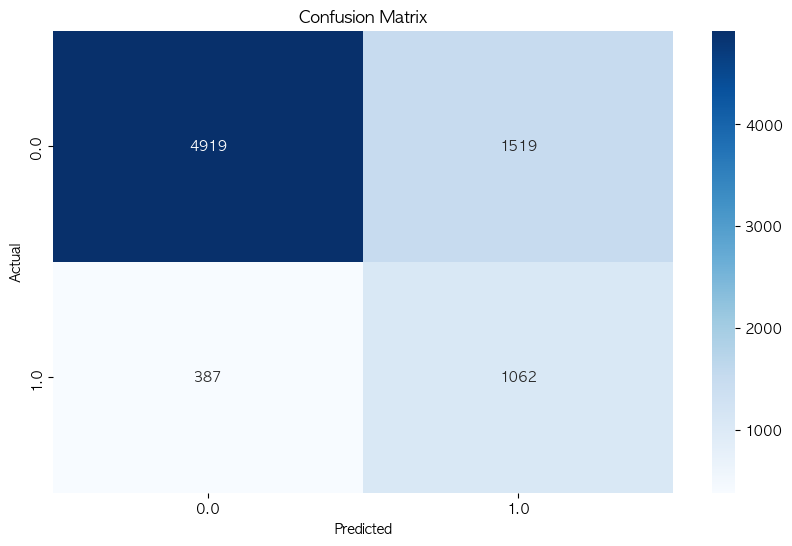

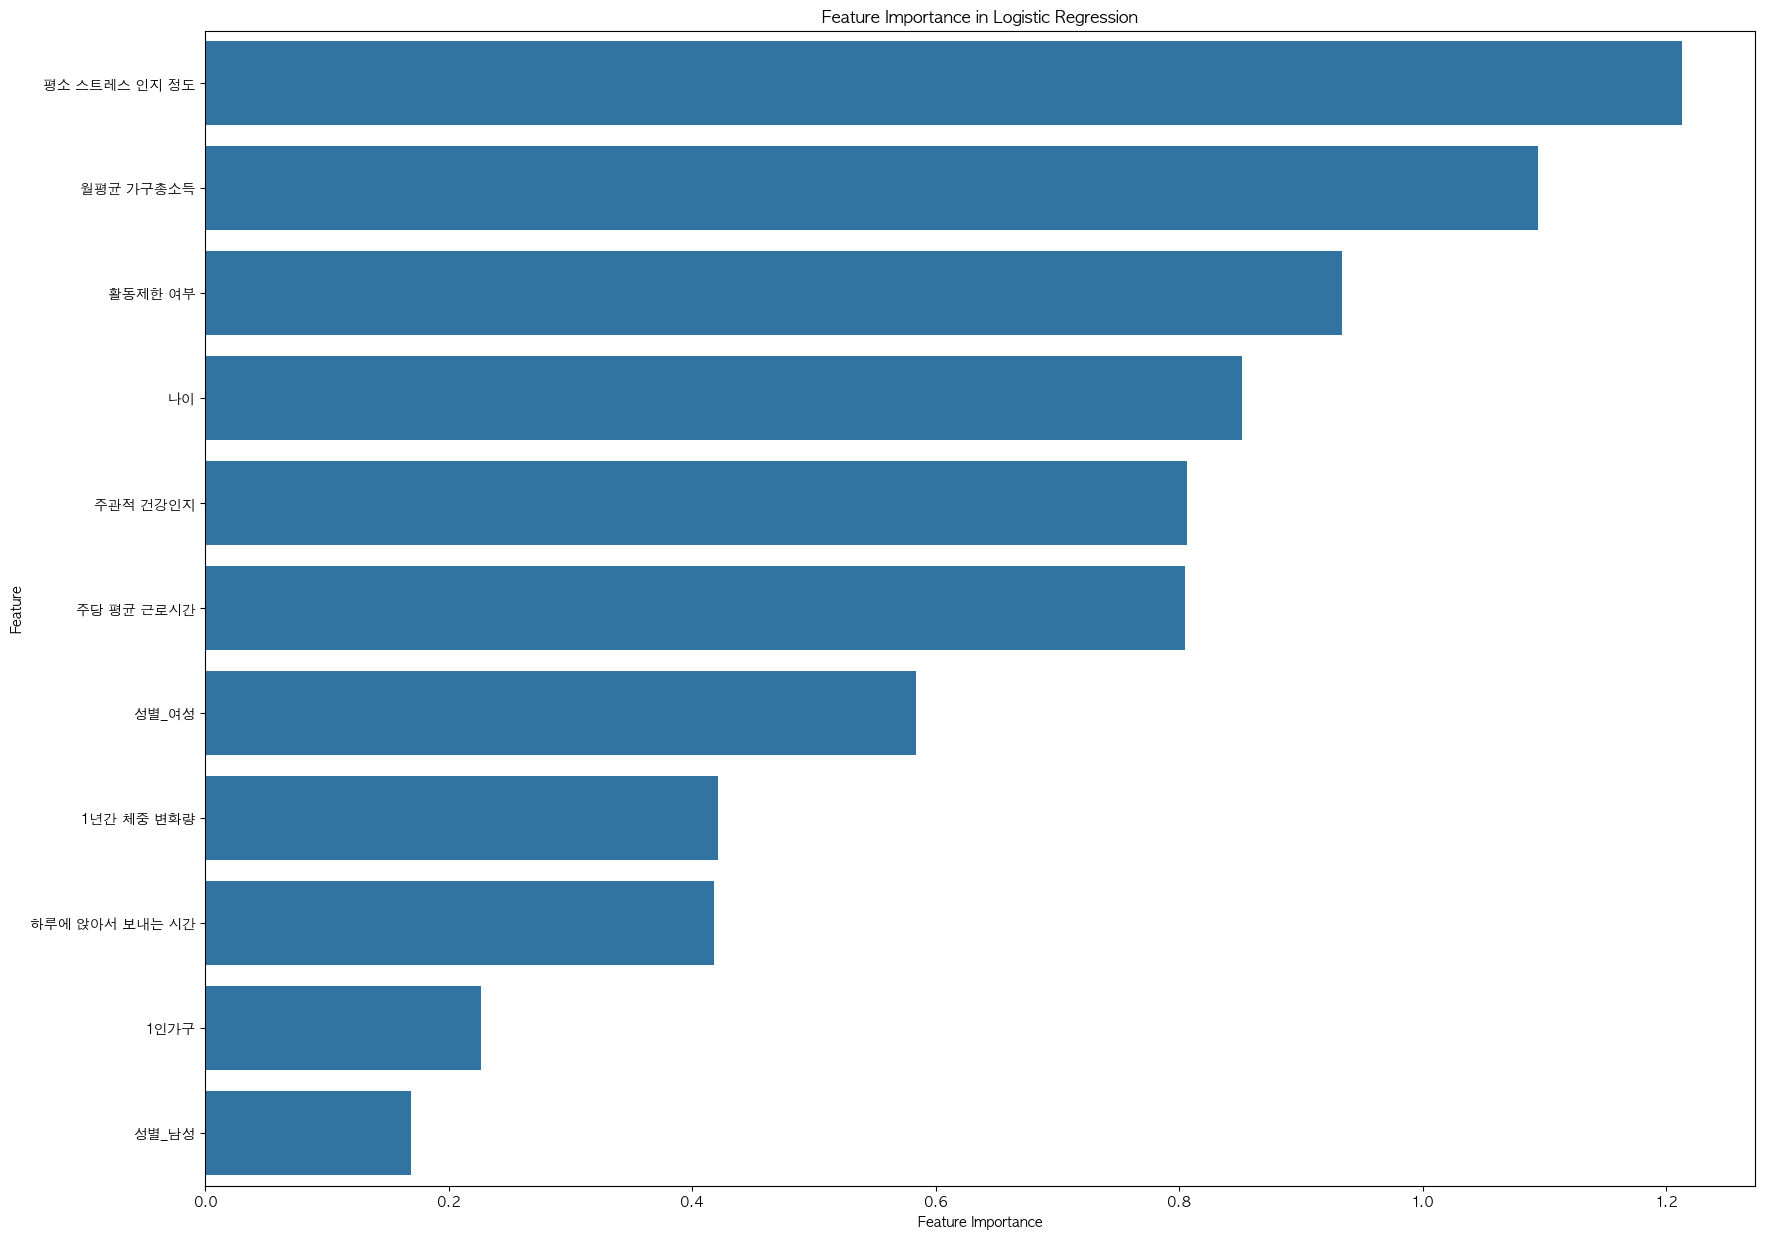

/Users/shinminseog/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shinminseog/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shinminseog/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/shinminseog/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/linear_m

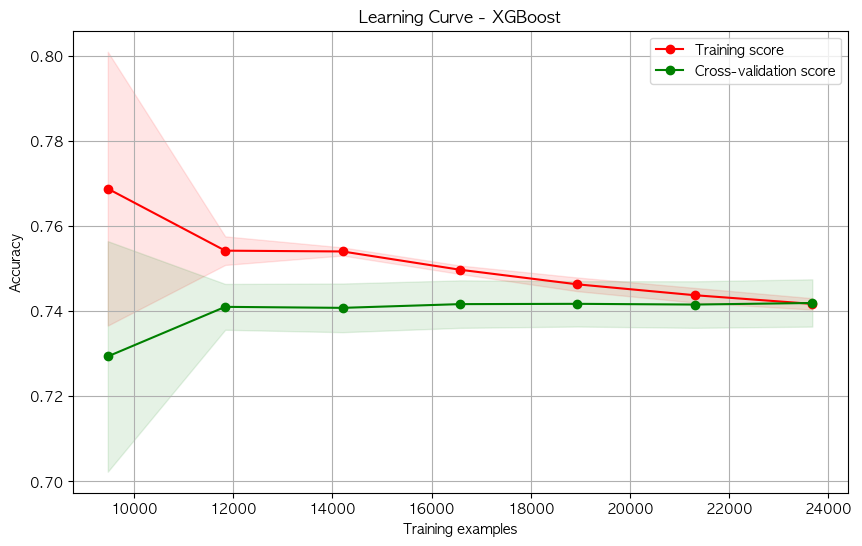

In [40]:
import shap
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import learning_curve

# 데이터 준비
X = train.drop(columns=['현재 우울증 여부(PHQ)', '우울증 분류'])
y = train['현재 우울증 여부(PHQ)']

# 다중 클래스 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 스케일링 적용할 컬럼 지정
min_scale_col = ['1년간 체중 변화량', '월평균 가구총소득', '주당 평균 근로시간', '나이', '하루에 앉아서 보내는 시간']

# Min-Max 스케일링 적용
scaler = MinMaxScaler()
X[min_scale_col] = scaler.fit_transform(X[min_scale_col])

# 카테고리형 변수의 인덱스를 지정
categorical_features_indices = [X.columns.get_loc(col) for col in [
    '주관적 건강인지', 
    '평소 스트레스 인지 정도'
]]

# 데이터셋을 트레인과 테스트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# SMOTENC 적용
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

# 로지스틱 회귀 모델 생성 및 훈련
model = LogisticRegression(class_weight='balanced', solver='liblinear')  # 'liblinear' solver가 SHAP에서 안정적일 수 있습니다.
model.fit(X_train_smote, y_train_smote)

# 모델 평가 및 예측
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)  # 각 클래스에 대한 예측 확률

# 성능 평가
report = classification_report(y_test, y_pred)
print(report)

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 특성 중요도 시각화
feature_importance = np.abs(model.coef_[0])
feature_names = X.columns

# 특성 중요도와 특성 이름을 DataFrame으로 만들기
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression')
plt.show()

# 러닝 커브 그리기
train_sizes, train_scores, test_scores = learning_curve(model, X_train_smote, y_train_smote,
                                                        cv=5, scoring='accuracy',
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve - XGBoost")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# RandomForest

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      6438
           1       0.46      0.52      0.49      1449

    accuracy                           0.80      7887
   macro avg       0.67      0.69      0.68      7887
weighted avg       0.81      0.80      0.80      7887



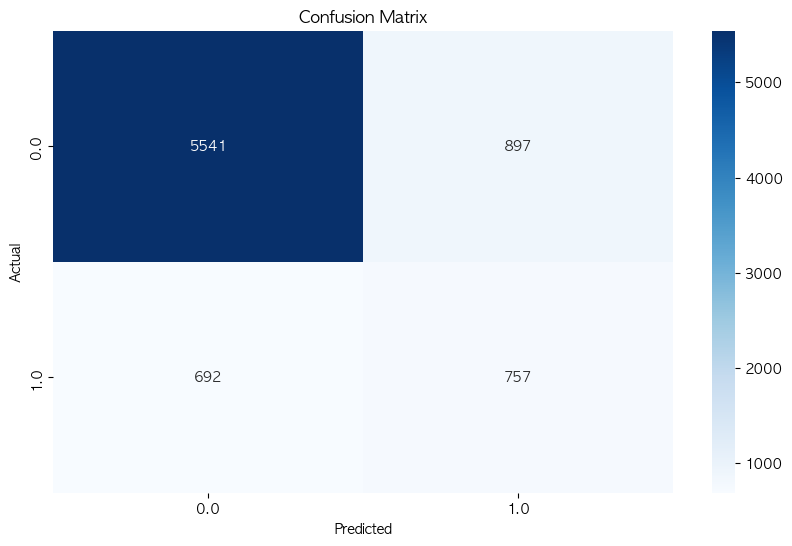

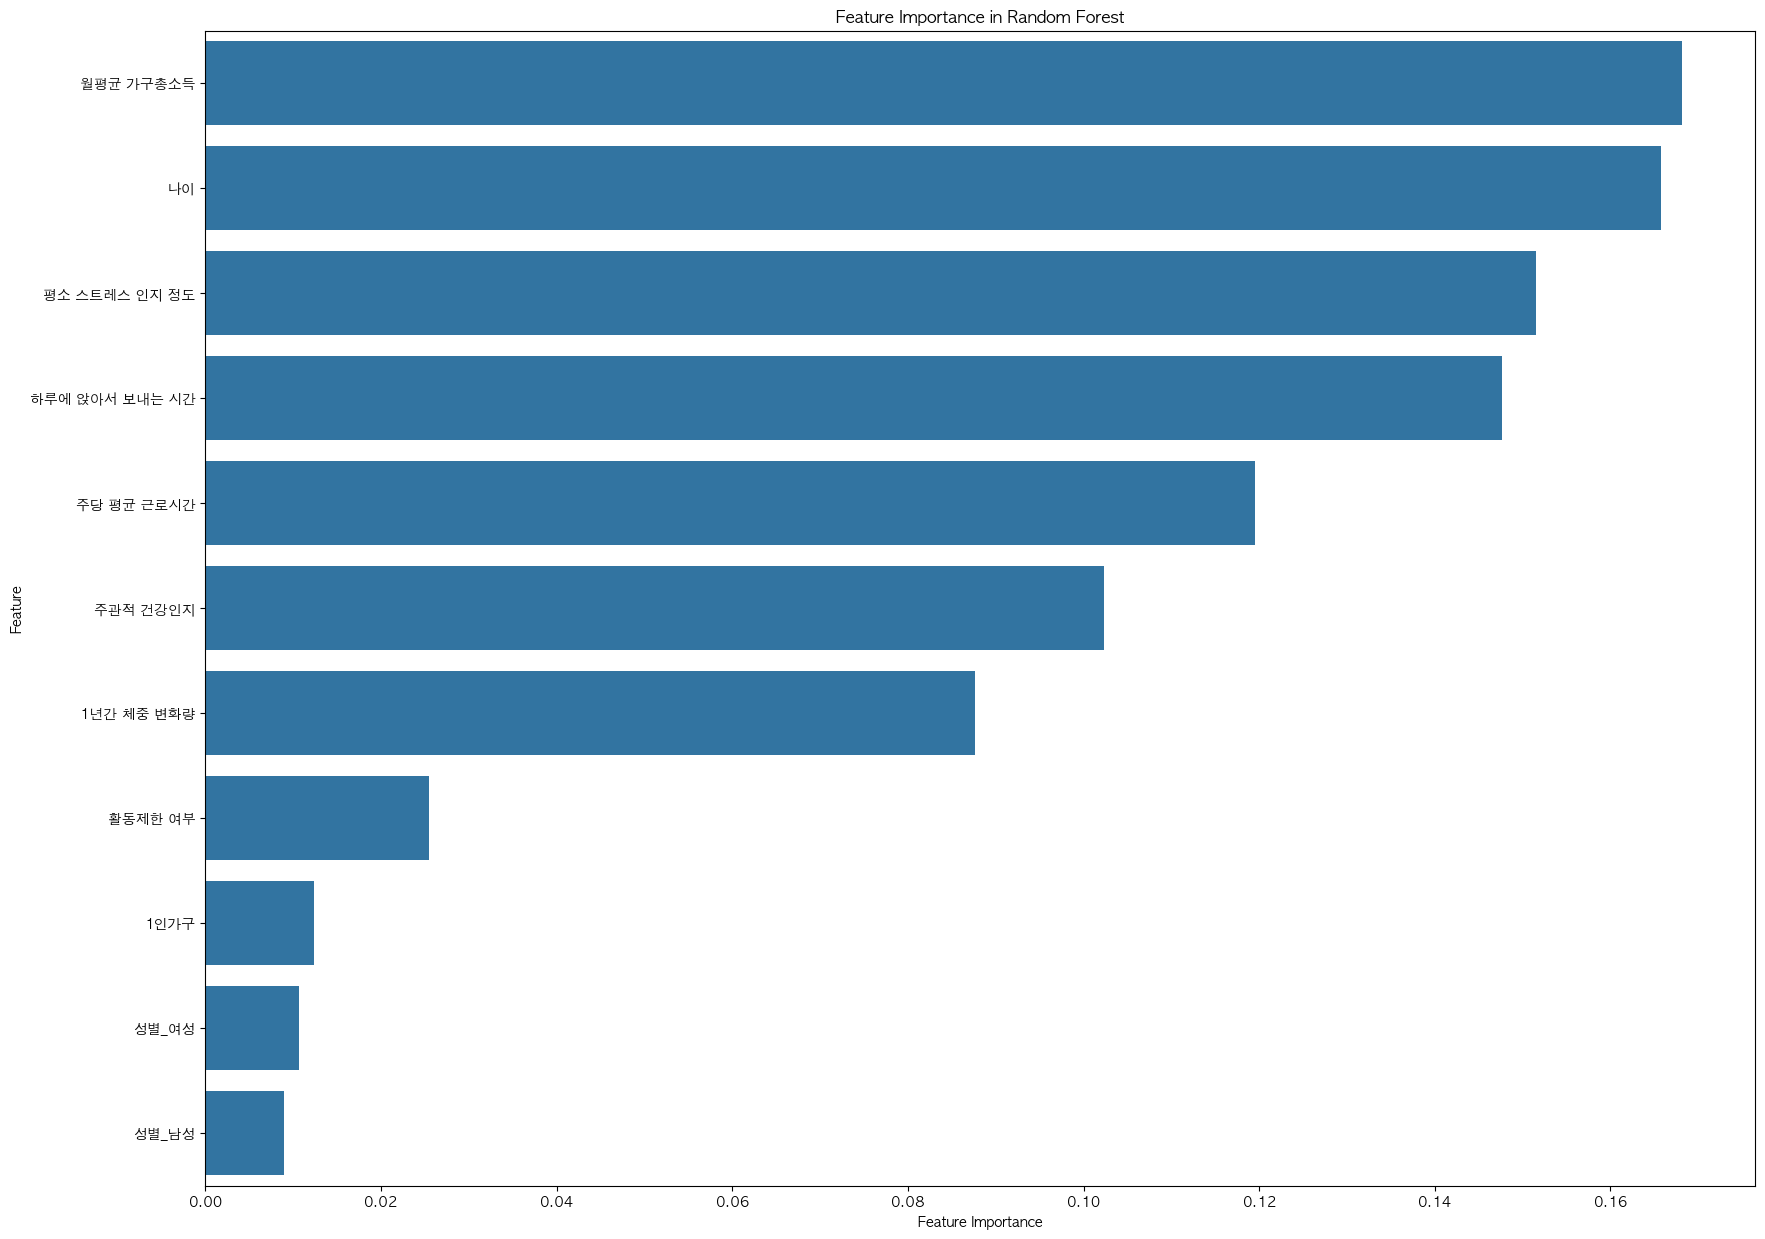

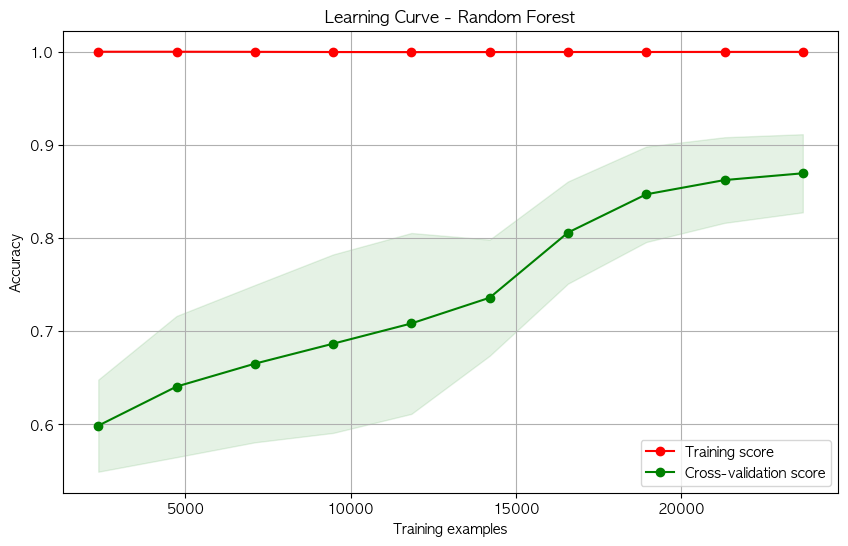

In [41]:
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import learning_curve

# 데이터 준비
X = train.drop(columns=['현재 우울증 여부(PHQ)', '우울증 분류'])
y = train['현재 우울증 여부(PHQ)']

# 다중 클래스 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 스케일링 적용할 컬럼 지정
min_scale_col = ['1년간 체중 변화량', '월평균 가구총소득', '주당 평균 근로시간', '나이', '하루에 앉아서 보내는 시간']

# Min-Max 스케일링 적용
scaler = MinMaxScaler()
X[min_scale_col] = scaler.fit_transform(X[min_scale_col])

# 카테고리형 변수의 인덱스를 지정
categorical_features_indices = [X.columns.get_loc(col) for col in [
    '주관적 건강인지', 
    '평소 스트레스 인지 정도'
]]

# 데이터셋을 트레인과 테스트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# SMOTENC 적용
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

# Random Forest 모델 생성 및 훈련
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)

# 모델 평가 및 예측
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)  # 각 클래스에 대한 예측 확률

# 성능 평가
report = classification_report(y_test, y_pred)
print(report)

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 특성 중요도 시각화
feature_importance = model.feature_importances_
feature_names = X.columns

# 특성 중요도와 특성 이름을 DataFrame으로 만들기
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()

# 러닝 커브 그리기
train_sizes, train_scores, test_scores = learning_curve(model, X_train_smote, y_train_smote,
                                                        cv=5, scoring='accuracy',
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve - Random Forest")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# LGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14799, number of negative: 14799
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 29598, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      6438
           1       0.51      0.48      0.49      1449

    accuracy                           0.82      7887
   macro avg       0.70      0.69      0.69      7887
weighted avg       0.82      0.82      0.82      7887



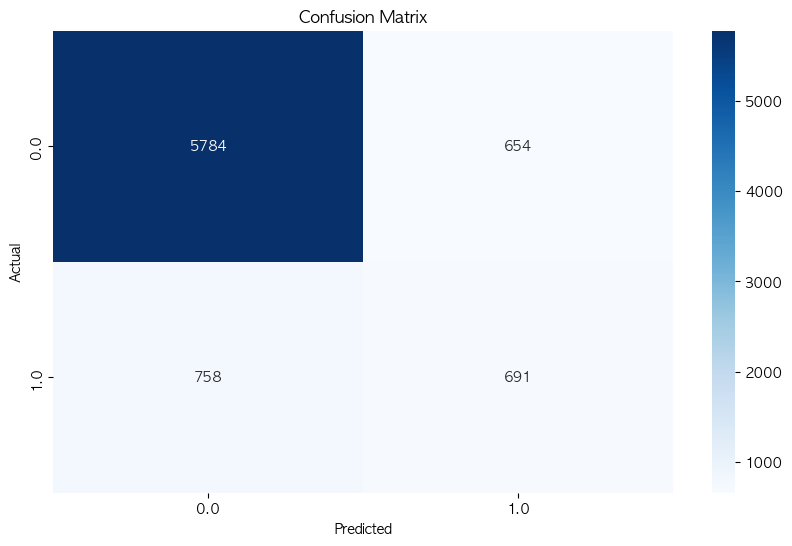

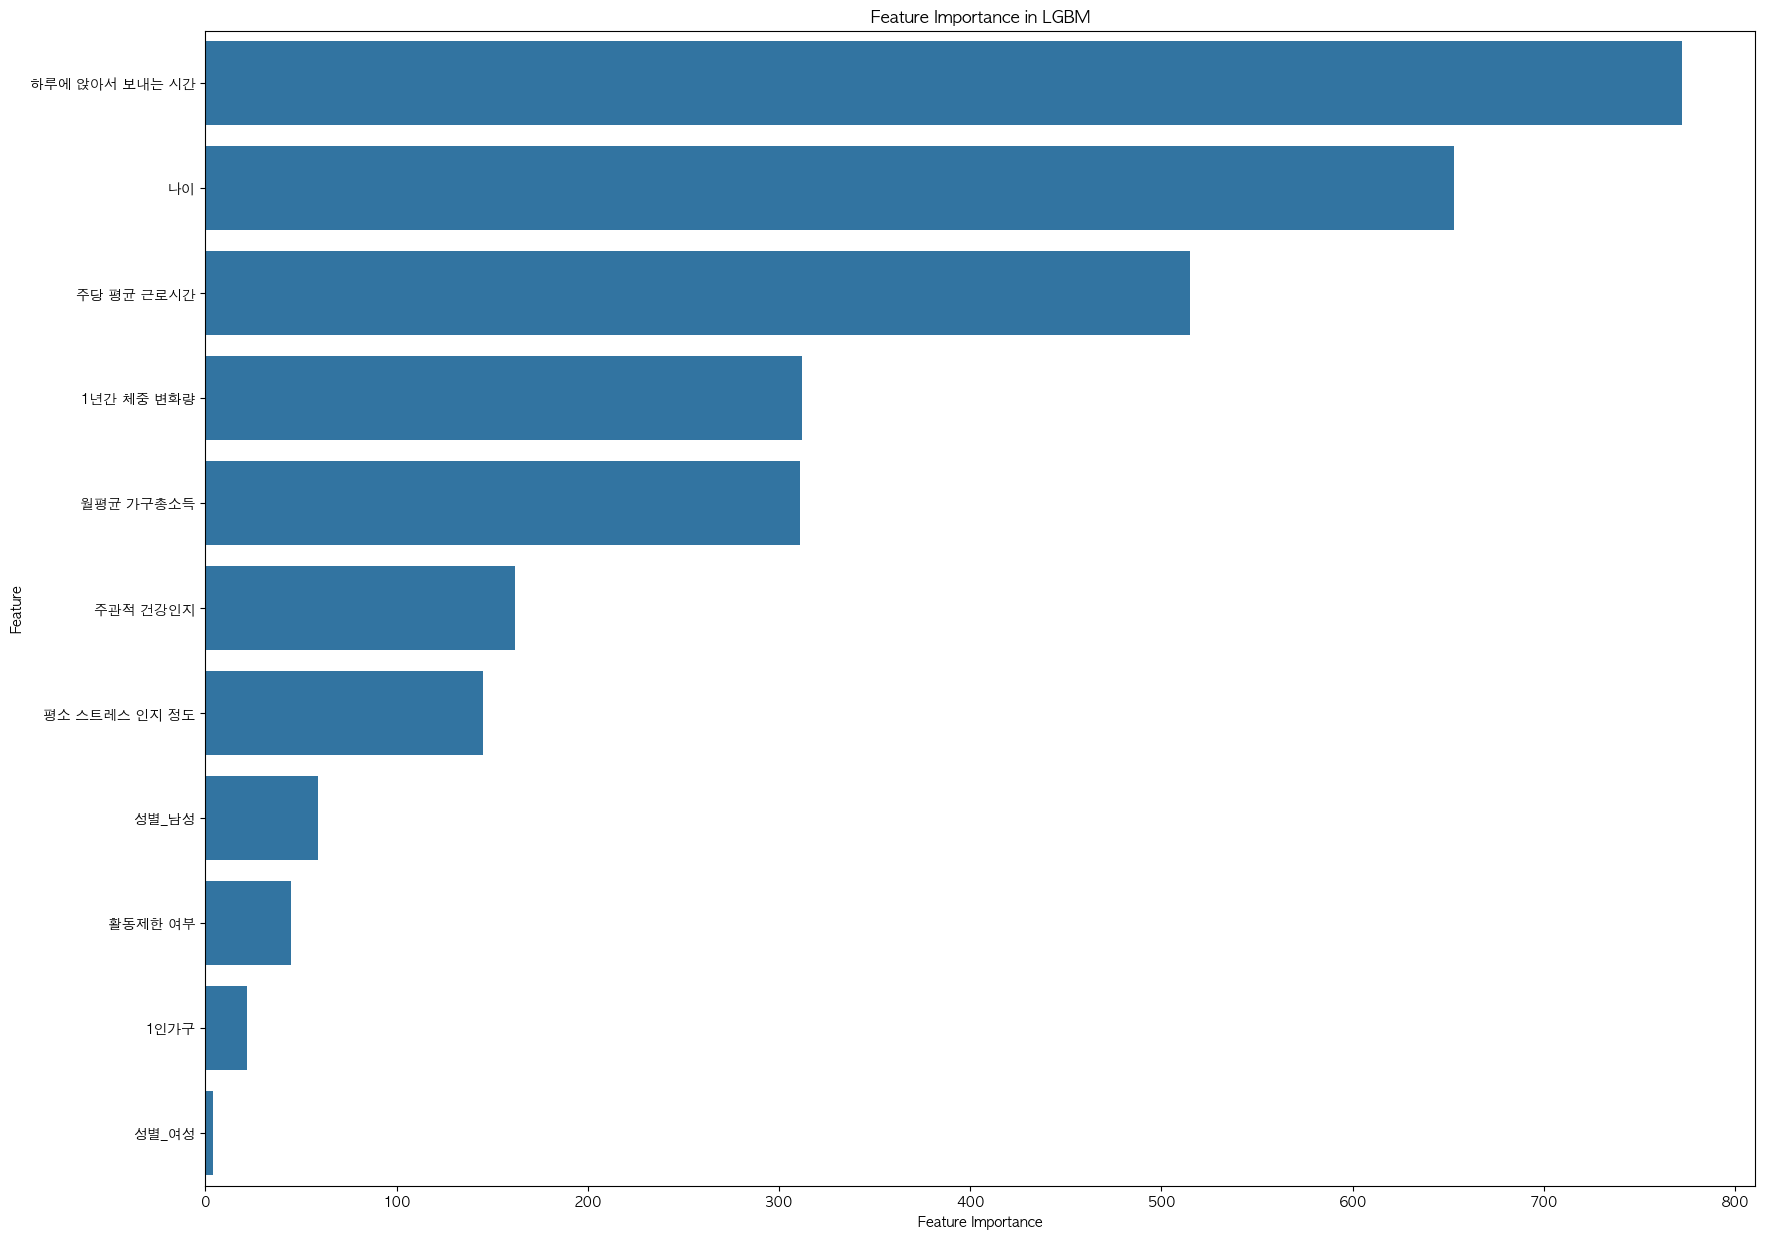

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 2367
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 7103
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14, number of negative: 9457
[LightGBM] [Info] Number of positive: 7103, number of negative: 11839
[

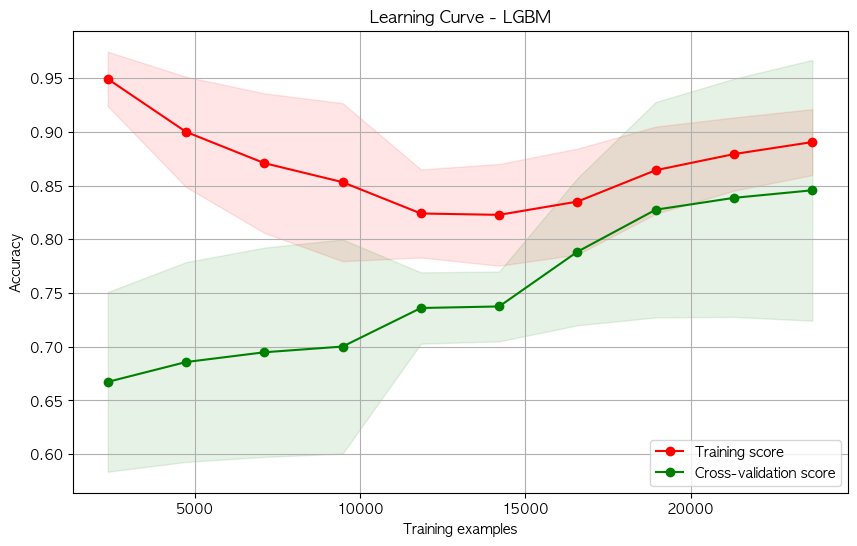

In [42]:
import shap
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import learning_curve

# 데이터 준비
X = train.drop(columns=['현재 우울증 여부(PHQ)', '우울증 분류'])
y = train['현재 우울증 여부(PHQ)']

# 다중 클래스 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 스케일링 적용할 컬럼 지정
min_scale_col = ['1년간 체중 변화량', '월평균 가구총소득', '주당 평균 근로시간', '나이', '하루에 앉아서 보내는 시간']

# Min-Max 스케일링 적용
scaler = MinMaxScaler()
X[min_scale_col] = scaler.fit_transform(X[min_scale_col])

# 카테고리형 변수의 인덱스를 지정
categorical_features_indices = [X.columns.get_loc(col) for col in [
    '주관적 건강인지', 
    '평소 스트레스 인지 정도'
]]

# 데이터셋을 트레인과 테스트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# SMOTENC 적용
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

# LGBM 모델 생성 및 훈련
model = LGBMClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)

# 모델 평가 및 예측
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)  # 각 클래스에 대한 예측 확률

# 성능 평가
report = classification_report(y_test, y_pred)
print(report)

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 특성 중요도 시각화
feature_importance = model.feature_importances_
feature_names = X.columns

# 특성 중요도와 특성 이름을 DataFrame으로 만들기
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in LGBM')
plt.show()

# 러닝 커브 그리기
train_sizes, train_scores, test_scores = learning_curve(model, X_train_smote, y_train_smote,
                                                        cv=5, scoring='accuracy',
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve - LGBM")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# XGBoost

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      6438
           1       0.43      0.63      0.51      1449

    accuracy                           0.78      7887
   macro avg       0.67      0.72      0.68      7887
weighted avg       0.82      0.78      0.79      7887



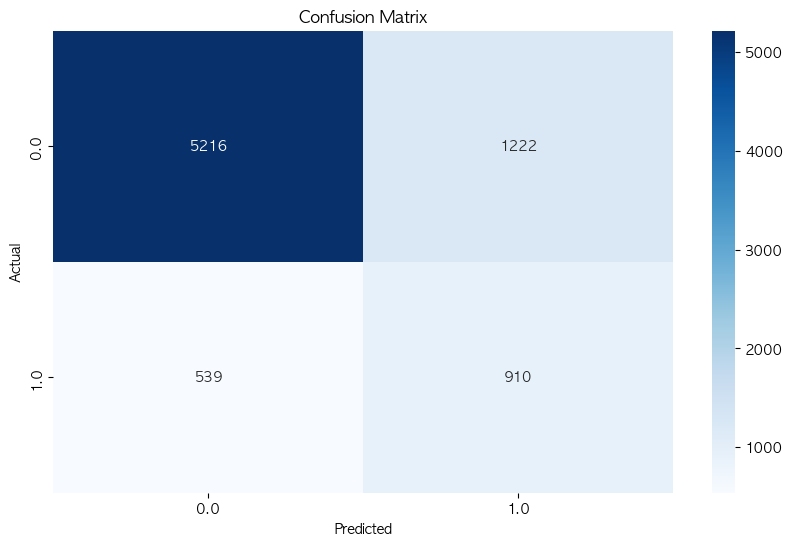

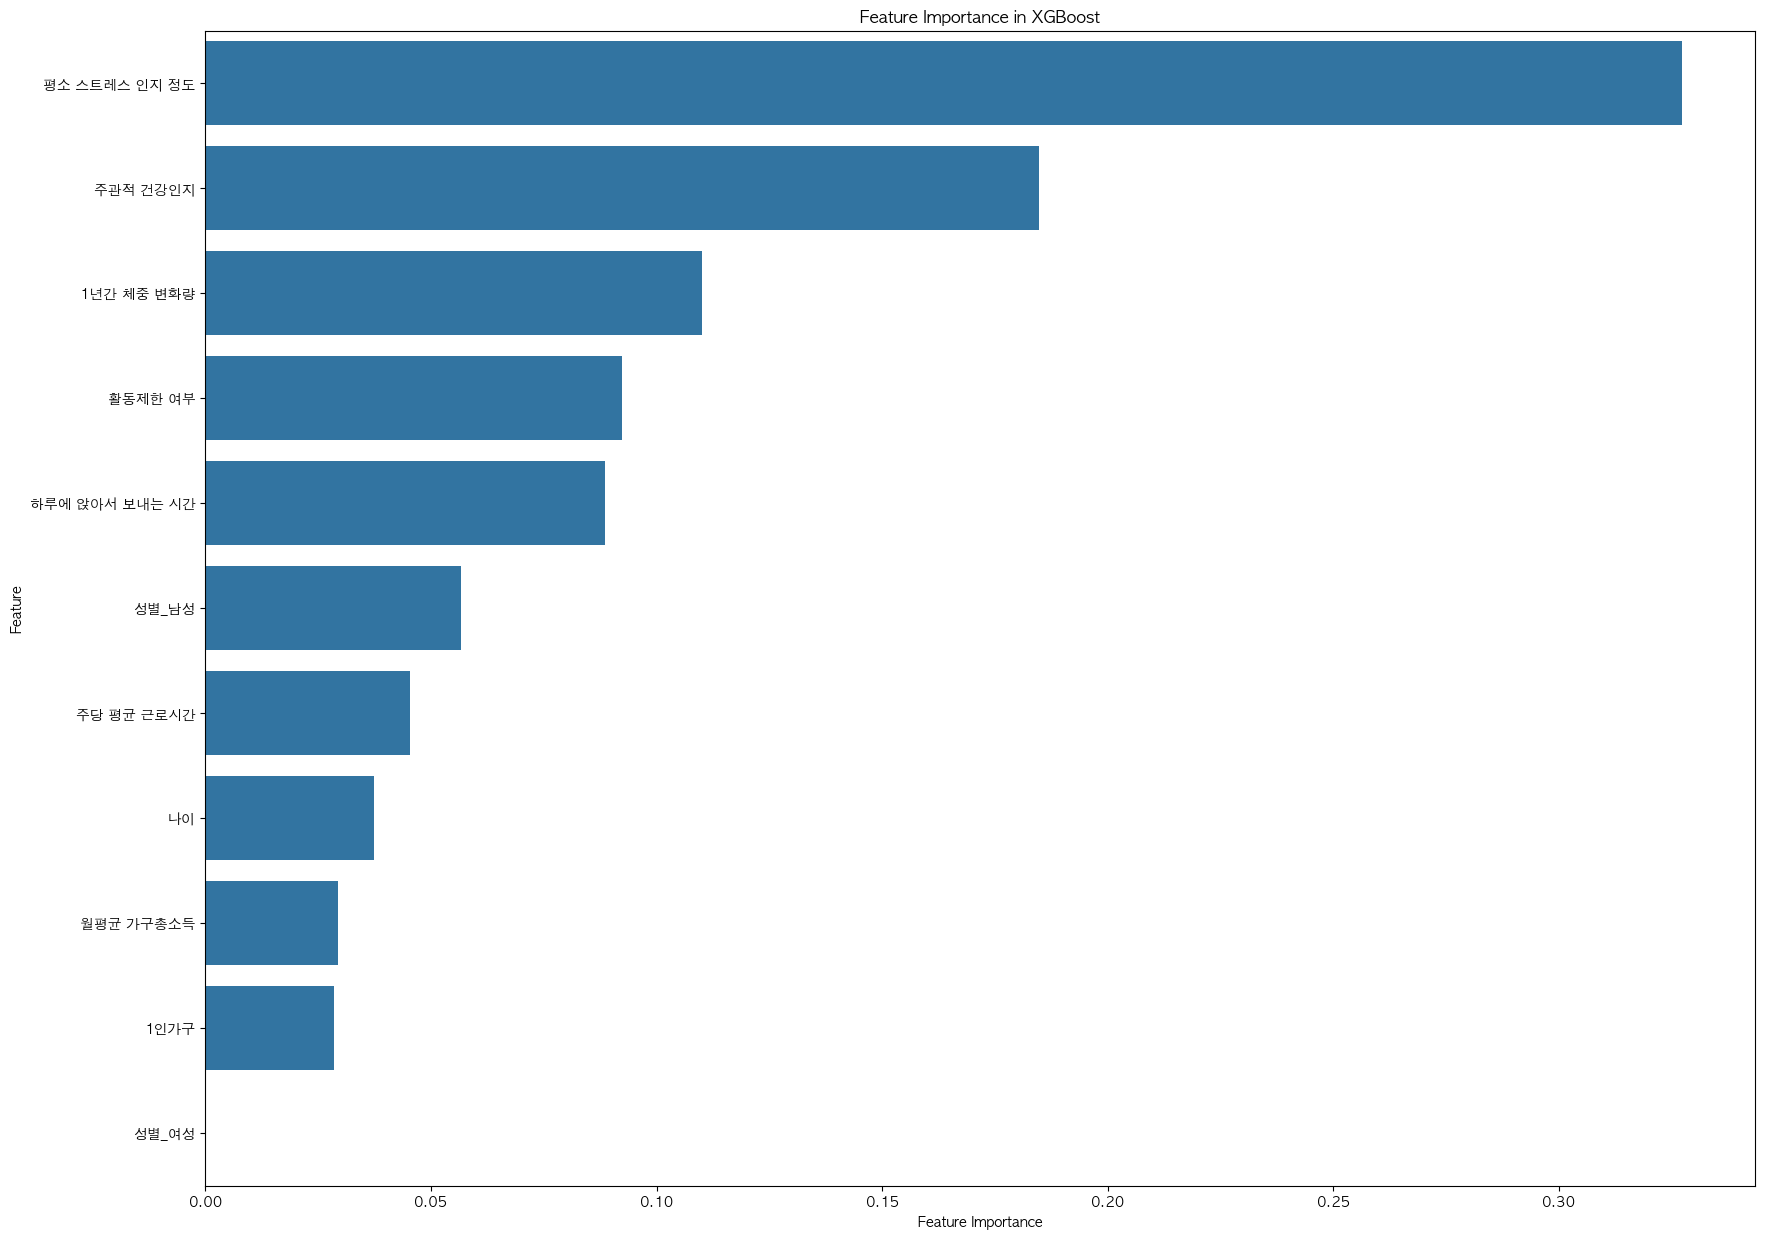

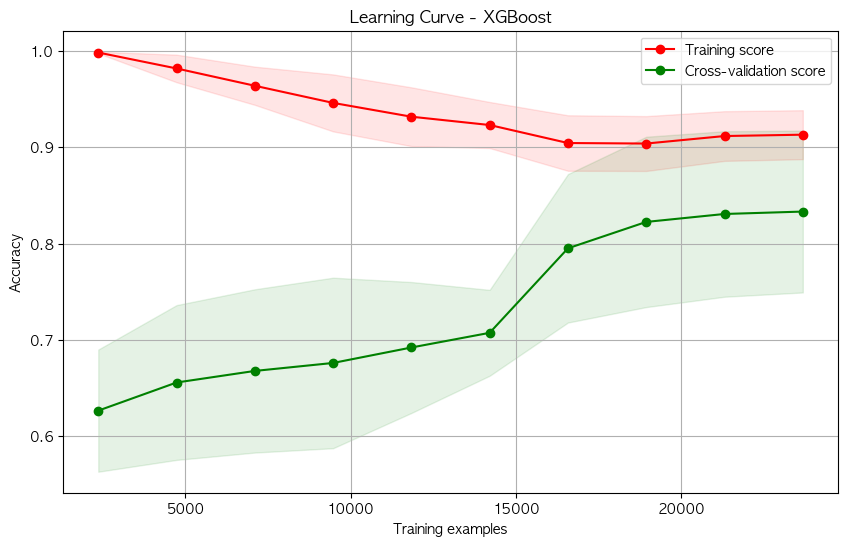

In [43]:
import shap
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import learning_curve

# 데이터 준비
X = train.drop(columns=['현재 우울증 여부(PHQ)', '우울증 분류'])
y = train['현재 우울증 여부(PHQ)']

# 다중 클래스 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 스케일링 적용할 컬럼 지정
min_scale_col = ['1년간 체중 변화량', '월평균 가구총소득', '주당 평균 근로시간', '나이', '하루에 앉아서 보내는 시간']

# Min-Max 스케일링 적용
scaler = MinMaxScaler()
X[min_scale_col] = scaler.fit_transform(X[min_scale_col])

# 카테고리형 변수의 인덱스를 지정
categorical_features_indices = [X.columns.get_loc(col) for col in [
    '주관적 건강인지', 
    '평소 스트레스 인지 정도'
]]

# 데이터셋을 트레인과 테스트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# SMOTENC 적용
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

# XGBoost 모델 생성 및 훈련
model = XGBClassifier(scale_pos_weight=len(y_train_smote)/np.bincount(y_train_smote)[1], random_state=42)
model.fit(X_train_smote, y_train_smote)

# 모델 평가 및 예측
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)  # 각 클래스에 대한 예측 확률

# 성능 평가
report = classification_report(y_test, y_pred)
print(report)

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 특성 중요도 시각화
feature_importance = model.feature_importances_
feature_names = X.columns

# 특성 중요도와 특성 이름을 DataFrame으로 만들기
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost')
plt.show()

# 러닝 커브 그리기
train_sizes, train_scores, test_scores = learning_curve(model, X_train_smote, y_train_smote,
                                                        cv=5, scoring='accuracy',
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve - XGBoost")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# TensorFlow

결측치 확인 (SMOTENC 적용 후): False
Epoch 1/200


/Users/shinminseog/opt/anaconda3/envs/dl/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


740/740 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.7297 - loss: 0.5275 - val_accuracy: 0.5311 - val_loss: 0.8000
Epoch 2/200
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.7507 - loss: 0.5051 - val_accuracy: 0.5299 - val_loss: 0.8161
Epoch 3/200
740/740 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.7486 - loss: 0.5016 - val_accuracy: 0.6463 - val_loss: 0.6399
Epoch 4/200
740/740 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.7545 - loss: 0.5012 - val_accuracy: 0.5914 - val_loss: 0.7361
Epoch 5/200
740/740 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.7617 - loss: 0.4923 - val_accuracy: 0.6387 - val_loss: 0.6855
Epoch 6/200
740/740 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.7578 - loss: 0.4974 - val_accuracy: 0.6091 - val_loss: 0.7162
Epoch 7/200
740/740 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.7542 - loss: 0.5013 - val_accuracy: 0.5845 - val_loss: 0.7385
Epoch 8/200
740/740 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.7609 - loss: 0.4972 - val_

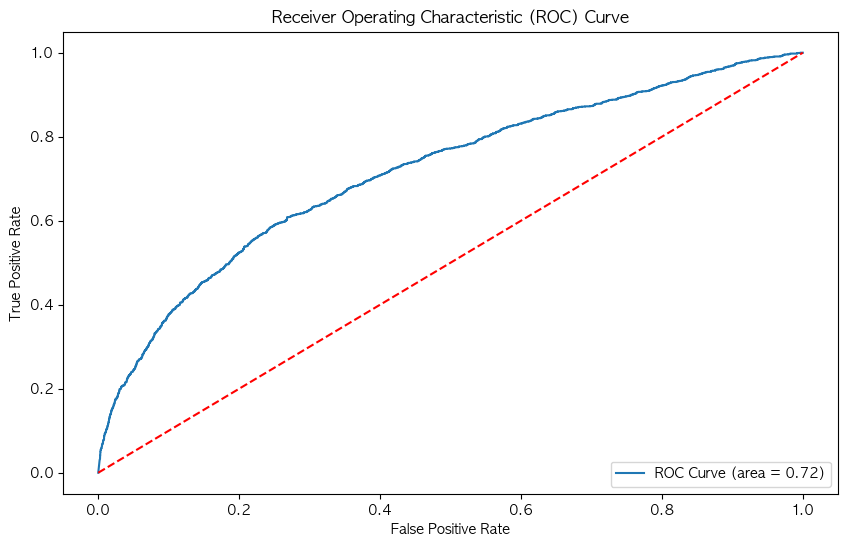

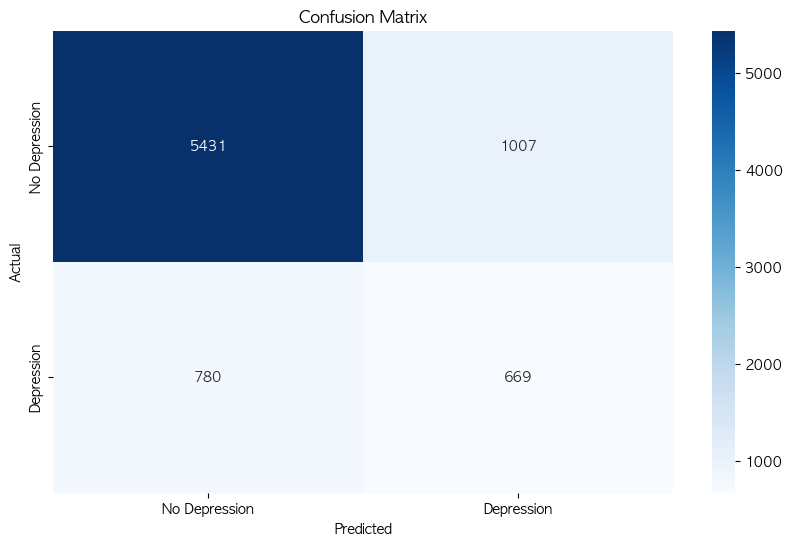

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
X = train.drop(columns=['현재 우울증 여부(PHQ)', '우울증 분류'])
y = train['현재 우울증 여부(PHQ)']

# 결측치 제거
X = X.dropna()
y = y.loc[X.index]  # 결측치가 제거된 X에 맞게 y도 동일한 인덱스를 유지

# 다중 클래스 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 스케일링 적용할 컬럼 지정
min_scale_col = ['1년간 체중 변화량', '월평균 가구총소득', '주당 평균 근로시간', '나이', '하루에 앉아서 보내는 시간']

# Min-Max 스케일링 적용
scaler = MinMaxScaler()
X[min_scale_col] = scaler.fit_transform(X[min_scale_col])

# 카테고리형 변수의 인덱스를 지정
categorical_features_indices = [X.columns.get_loc(col) for col in [
    '주관적 건강인지', 
    '평소 스트레스 인지 정도'
]]

# 데이터셋을 트레인과 테스트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# SMOTENC 적용
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

# SMOTENC 적용 후 결측치 제거
mask = ~np.isnan(X_train_smote).any(axis=1)  # 결측치가 없는 행만 선택
X_train_smote = X_train_smote[mask]
y_train_smote = y_train_smote[mask]  # 결측치가 제거된 X_train_smote에 맞춰 y_train_smote도 필터링

# 결측치 여부 확인
print("결측치 확인 (SMOTENC 적용 후):", np.any(np.isnan(X_train_smote)))

# 모델 정의 (모델 구조 변경)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(X_train_smote, y_train_smote, epochs=200, batch_size=32, validation_split=0.2)

# 모델 평가 및 예측
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

# ROC 곡선 시각화
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 최종 모델 선택 (LGBM) - GridSearchCV

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 9702, number of negative: 9703
[LightGBM] [Info] Number of positive: 9702, number of negative: 9702


/Users/shinminseog/opt/anaconda3/envs/dl/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 12128, number of negative: 12128
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1294
[LightGBM] [Info] Number of data points in the train set: 24256, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

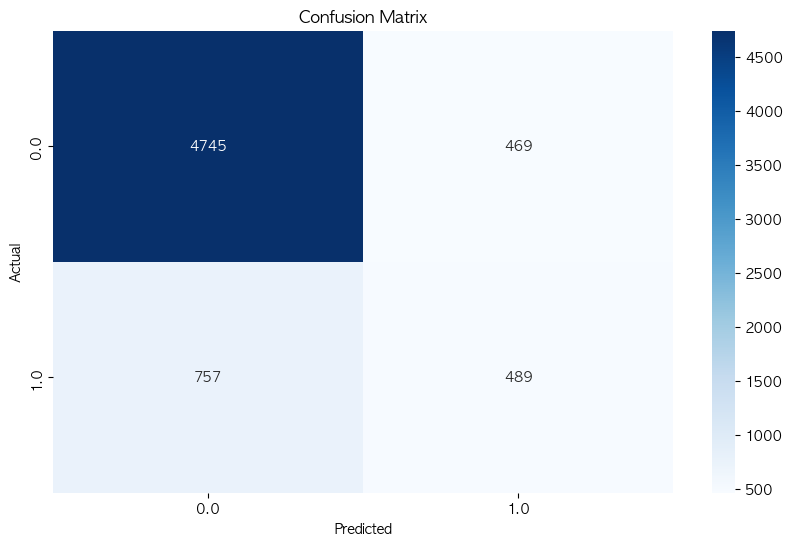

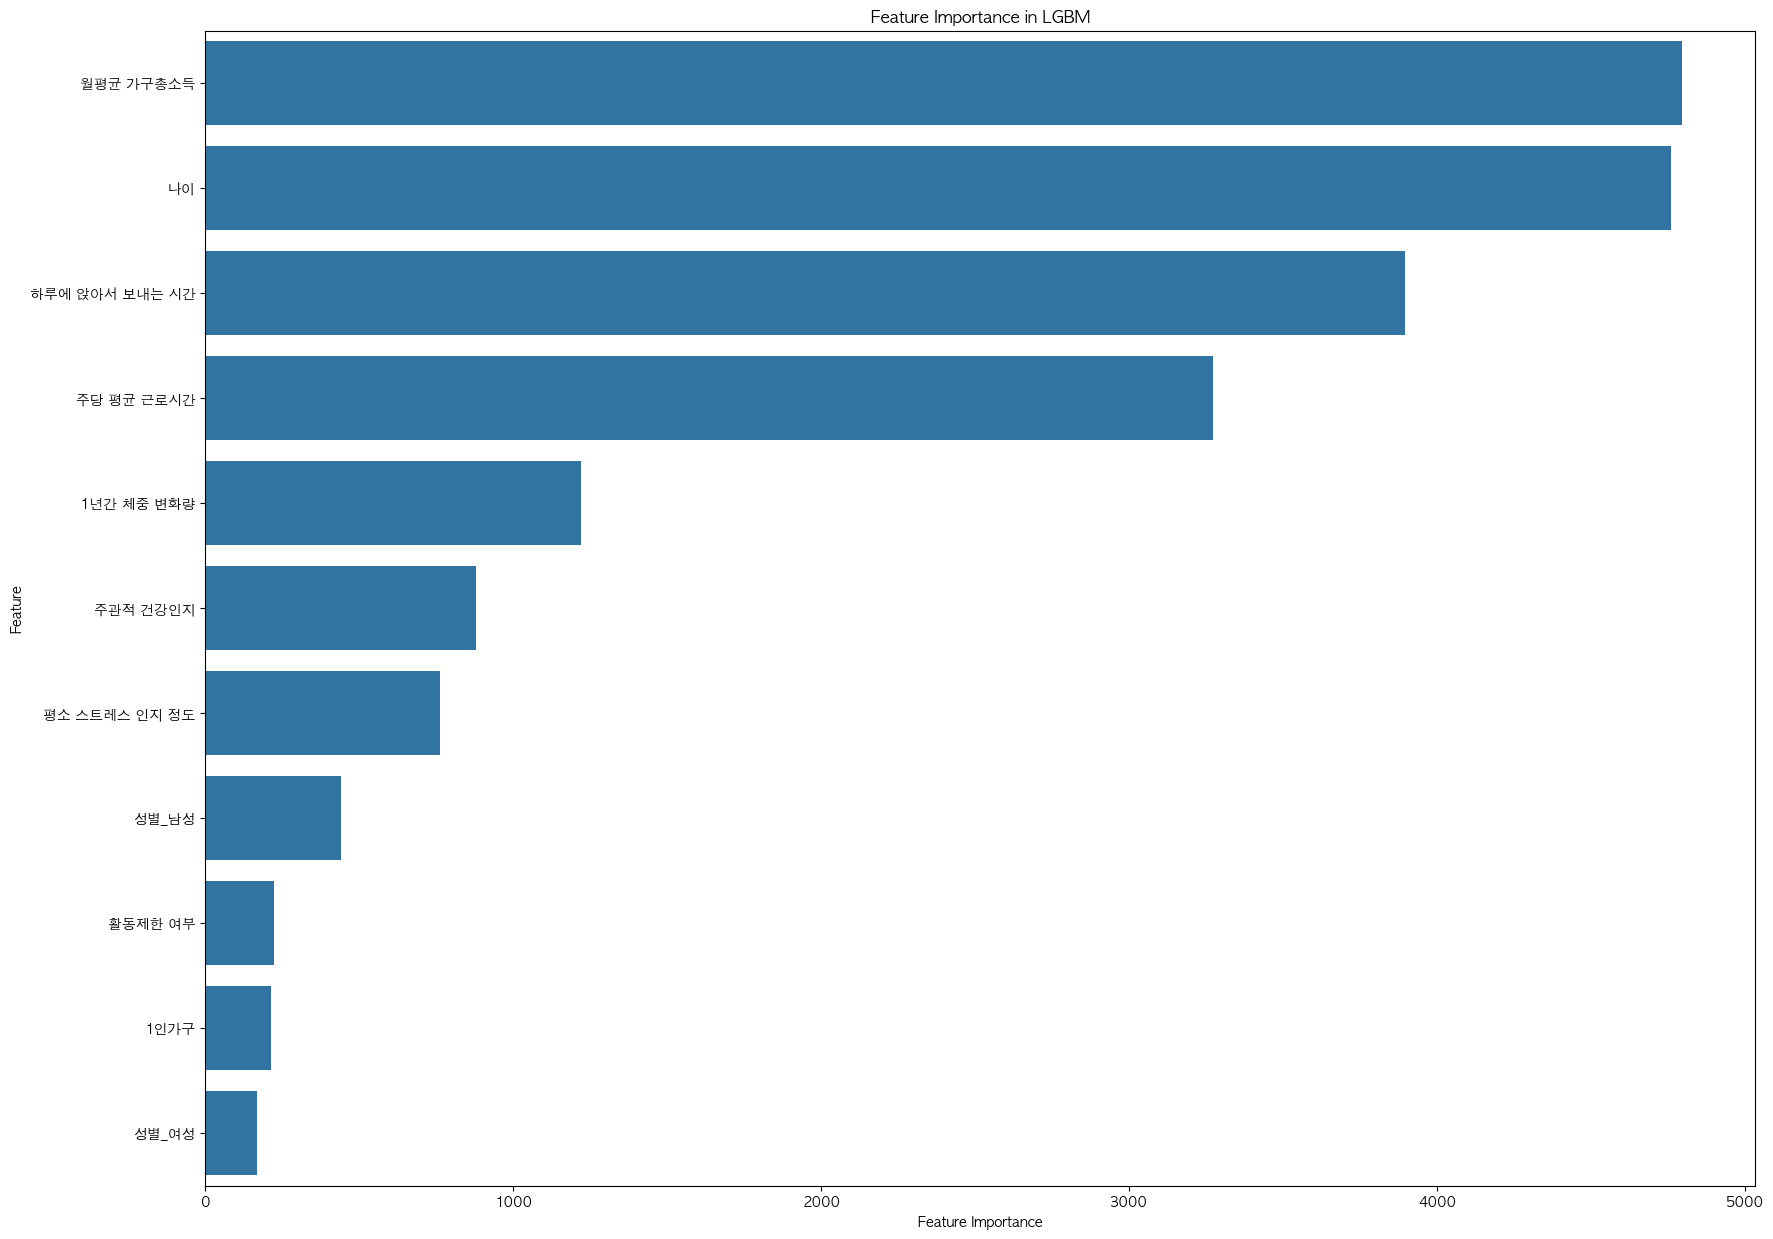

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 1940
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 445
[LightGBM] [Info] Number of data points in the train set: 1940, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM]

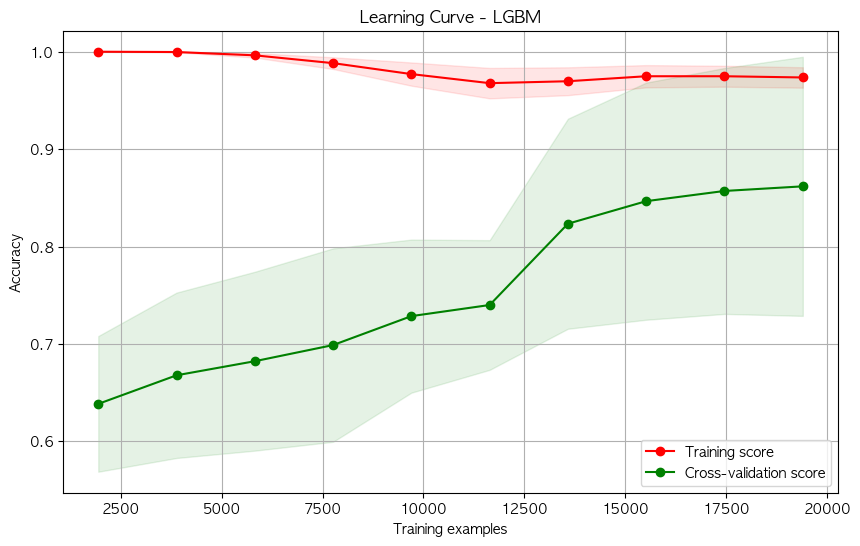

In [131]:
import shap
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import learning_curve

# 데이터 준비
X = train.drop(columns=['현재 우울증 여부(PHQ)', '우울증 분류'])
y = train['현재 우울증 여부(PHQ)']

# 다중 클래스 레이블 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 스케일링 적용할 컬럼 지정
min_scale_col = ['1년간 체중 변화량', '월평균 가구총소득', '주당 평균 근로시간', '나이', '하루에 앉아서 보내는 시간']

# Min-Max 스케일링 적용
scaler = MinMaxScaler()
X[min_scale_col] = scaler.fit_transform(X[min_scale_col])

# 카테고리형 변수의 인덱스를 지정
categorical_features_indices = [X.columns.get_loc(col) for col in [
    '주관적 건강인지', 
    '평소 스트레스 인지 정도'
]]

# 데이터셋을 트레인과 테스트로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# SMOTENC 적용
smote_nc = SMOTENC(categorical_features=categorical_features_indices, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)

# LGBM 모델 생성
model = LGBMClassifier(class_weight='balanced', random_state=42)

# GridSearchCV로 하이퍼파라미터 튜닝
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_smote, y_train_smote)

# 최적의 하이퍼파라미터 출력
print(f'Best Hyperparameters: {grid_search.best_params_}')

# 최적의 하이퍼파라미터로 학습된 모델로 예측
best_model = grid_search.best_estimator_

# 모델 평가 및 예측
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)  # 각 클래스에 대한 예측 확률

# 성능 평가
report = classification_report(y_test, y_pred)
print(report)

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 특성 중요도 시각화
feature_importance = best_model.feature_importances_
feature_names = X.columns

# 특성 중요도와 특성 이름을 DataFrame으로 만들기
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 15))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in LGBM')
plt.show()

# 러닝 커브 그리기
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_smote, y_train_smote,
                                                        cv=5, scoring='accuracy',
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve - LGBM")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

# 모델 저장

In [132]:
# 모델 저장
import joblib

# LightGBM 모델을 파일로 저장
model_filename = './model/depressive.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to ./model/depressive.pkl


# 모델 불러오기

In [133]:
train

,나이,월평균 가구총소득,주관적 건강인지,활동제한 여부,주당 평균 근로시간,평소 스트레스 인지 정도,우울증 분류,현재 우울증 여부(PHQ),1년간 체중 변화량,하루에 앉아서 보내는 시간,1인가구,성별_남성,성별_여성
0,30,355.833333,3.0,False,54.0,3.0,정상,0.0,-1.0,10.000000,False,False,True
1,56,355.833333,4.0,True,0.0,2.0,가벼운 우울증,1.0,-1.0,5.000000,False,False,True
2,29,355.833333,3.0,False,50.0,4.0,정상,0.0,-1.0,8.000000,False,True,False
3,65,78.000000,3.0,False,39.0,3.0,정상,0.0,-3.0,2.166667,False,True,False
4,57,130.000000,4.0,False,0.0,4.0,정상,0.0,0.0,8.000000,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23621,61,308.333333,3.0,False,25.0,3.0,정상,0.0,0.0,4.000000,False,False,True
23622,51,500.000000,3.0,False,45.0,3.0,정상,0.0,0.0,6.000000,False,False,True
23623,24,500.000000,3.0,False,40.0,3.0,정상,0.0,1.0,5.000000,False,False,True
23624,65,196.666667,2.0,False,0.0,3.0,정상,0.0,0.0,4.000000,False,True,False


In [134]:
X_train

,나이,월평균 가구총소득,주관적 건강인지,활동제한 여부,주당 평균 근로시간,평소 스트레스 인지 정도,1년간 체중 변화량,하루에 앉아서 보내는 시간,1인가구,성별_남성,성별_여성
10899,0.868852,0.102247,5.0,True,0.297710,2.0,0.333333,0.467742,False,False,True
15175,0.098361,0.325843,1.0,False,0.305344,3.0,0.500000,0.758065,False,True,False
8109,0.754098,0.029213,4.0,False,0.000000,3.0,0.333333,0.225806,True,True,False
18721,0.426230,0.219101,3.0,False,0.114504,2.0,0.500000,0.467742,False,False,True
15153,0.393443,0.191011,2.0,False,0.343511,3.0,0.500000,0.564516,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
12441,0.344262,0.416404,2.0,False,0.305344,4.0,0.666667,0.467742,False,True,False
13168,0.901639,0.033483,3.0,False,0.000000,4.0,0.500000,0.903226,True,False,True
5972,0.655738,0.123596,2.0,False,0.000000,4.0,0.500000,0.225806,False,False,True
944,0.540984,0.438202,1.0,False,0.000000,3.0,0.500000,0.467742,False,False,True


In [135]:
import joblib
import numpy as np

# 모델 불러오기
model_filename = './model/depressive.pkl'
loaded_model = joblib.load(model_filename)
print("Model loaded from file")

# 사용자 입력 받기 (예시로 사용자가 직접 입력하는 방법)
# 각 특성에 대한 값을 입력받습니다.
# user_input = {
#     '나이': int(input("나이: ")),
#     '성별': input("성별: "),
#     '주관적 건강인지': int(input("주관적 건강인지 (카테고리 번호): ")),
#     '월평균 가구총소득': float(input("월평균 가구총소득: ")),
#     '활동제한 여부': bool(input("활동제한 여부: ")),
#     '주당 평균 근로시간': float(input("주당 평균 근로시간: ")),
#     '평소 스트레스 인지 정도': int(input("평소 스트레스 인지 정도 (카테고리 번호): ")),
#     '1년간 체중 변화량': int(input("1년간 체중 변화량: ")),
#     '하루에 앉아서 보내는 시간': float(input("하루에 앉아서 보내는 시간: ")),
#     '1인가구': bool(input("1인 가구 여부 : "))
# }

user_input = {
    '나이': 24,
    '성별': '남성',
    '주관적 건강인지': 4,
    '월평균 가구총소득': 0,
    '활동제한 여부': False,
    '주당 평균 근로시간': 0,
    '평소 스트레스 인지 정도': 3,
    '1년간 체중 변화량': 0,
    '하루에 앉아서 보내는 시간': 15.5,
    '1인가구': True
}

user_input = pd.DataFrame(user_input, index=[0])
user_input['성별_남성'] = user_input.apply(lambda row : True if row['성별'] == '남성' else False, axis=1)
user_input['성별_여성'] = user_input.apply(lambda row : True if row['성별'] == '여성' else False, axis=1)
user_input.drop('성별', axis=1, inplace=True)

# 예측 수행
prediction = loaded_model.predict(user_input)
prediction_prob = loaded_model.predict_proba(user_input)

# 예측 결과 출력
print(f"Prediction: {'Depression' if prediction[0] == 1 else 'No Depression'}")
print(f"Prediction Probability: {prediction_prob}")

Model loaded from file
Prediction: No Depression
Prediction Probability: [[0.98267766 0.01732234]]
